<a href="https://colab.research.google.com/github/ShabnaIlmi/Data-Science-Group-Project/blob/Future_Risk_prediction/Data_science_group_project('final').ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Loading the Dataset and dispalying


In [5]:

# Load dataset using pd.read_excel
df = pd.read_excel("/content/drive/MyDrive/DSGP/modified_chemical_import_data.xlsx")

In [7]:
# Display first few rows
df.head()

,Importer_ID,Chemical_Name,Import_Frequency,Import_Quantity (kg),Country_of_Origin,Compliance_History,Compliance_Score,Past_Violations,Financial_Stability,Risk_Category,Import_Trend,Future_Prediction
0,IMP001,"Fluorides; fluorosilicates, fluoroaluminates, ...",36,5199,Pakistan,Excellent,3.0,4,High,Risky,0,Decrease in imports
1,IMP002,Sulphuric acid; oleum,26,3398,Brazil,Poor,1.0,1,High,Not Risky,-10,Decrease in imports
2,IMP003,Sulphuric acid; oleum,47,5626,India,Average,2.0,5,Medium,Risky,21,Increase in imports
3,IMP004,Cyanides and cyanide oxides: Of sodium,91,7700,India,Excellent,3.0,4,Medium,Not Risky,44,Increase in imports
4,IMP005,Nitric acid; sulphonitric acids,63,8377,China,Average,2.0,4,Low,Not Risky,-28,Decrease in imports


# Exploratory Data Analysis (EDA)


In [10]:
# Displaying Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Importer_ID           400 non-null    object 
 1   Chemical_Name         400 non-null    object 
 2   Import_Frequency      400 non-null    int64  
 3   Import_Quantity (kg)  400 non-null    int64  
 4   Country_of_Origin     400 non-null    object 
 5   Compliance_History    400 non-null    object 
 6   Compliance_Score      290 non-null    float64
 7   Past_Violations       400 non-null    int64  
 8   Financial_Stability   400 non-null    object 
 9   Risk_Category         400 non-null    object 
 10  Import_Trend          400 non-null    int64  
 11  Future_Prediction     400 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 37.6+ KB


In [9]:
# Summary Statistics (useful for numerical features)
print(df.describe())

       Import_Frequency  Import_Quantity (kg)  Compliance_Score  \
count        400.000000            400.000000        290.000000   
mean          74.932500          72759.257500          1.993103   
std           39.853088         128844.794138          0.836011   
min            5.000000            102.000000          1.000000   
25%           42.000000           3419.750000          1.000000   
50%           69.500000           6738.500000          2.000000   
75%          108.000000          43932.000000          3.000000   
max          149.000000         494540.000000          3.000000   

       Past_Violations  Import_Trend  
count       400.000000    400.000000  
mean          2.477500      0.077500  
std           1.688675     55.002816  
min           0.000000   -130.000000  
25%           1.000000    -40.000000  
50%           3.000000      4.000000  
75%           4.000000     38.000000  
max           5.000000    132.000000  


## Identifying Categorical and Numerical Columns

In [11]:
# Identifying categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

### Displaying the Categorical Features

In [13]:
# Displaying the categorical features
print("Categorical Features:")
for feature in categorical_cols:
    print(f"- {feature}")

# Display data type of the columns
print("\nData Type of Categorical Features:")
print(df[categorical_cols].dtypes)

Categorical Features:
- Importer_ID
- Chemical_Name
- Country_of_Origin
- Compliance_History
- Financial_Stability
- Risk_Category
- Future_Prediction

Data Type of Categorical Features:
Importer_ID            object
Chemical_Name          object
Country_of_Origin      object
Compliance_History     object
Financial_Stability    object
Risk_Category          object
Future_Prediction      object
dtype: object


### identifying Unique values and their count relevant to each categorical column:


In [14]:
# Displaying the unique values and their counts relevant to each categorical column
print("Unique values and their count relevant to each categorical column:\n")
for col in categorical_cols:
    unique_values = df[col].unique()
    value_counts = df[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count relevant to each categorical column:

Importer_ID
IMP001    1
IMP264    1
IMP274    1
IMP273    1
IMP272    1
         ..
IMP131    1
IMP130    1
IMP129    1
IMP128    1
IMP400    1
Name: count, Length: 400, dtype: int64
 
Chemical_Name
Bromine                                                                           45
Fluorides; fluorosilicates, fluoroaluminates, and other complex fluorine salts    40
Chlorine                                                                          39
Cyanides and cyanide oxides: Of sodium                                            35
Iodine                                                                            34
Chlorates and perchlorates; bromates and perbromates; iodates and periodates      32
Cyanides and cyanide oxides: Other                                                32
Halides and halide oxides of non-metals                                           31
Nitric acid; sulphonitric acids                      

In [15]:
# Check for null values in categorical columns
for col in categorical_cols:
    null_count = df[col].isnull().sum()
    if null_count > 0:
        print(f"Column '{col}' has {null_count} null values.")
    else:
        print(f"Column '{col}' has no null values.")

Column 'Importer_ID' has no null values.
Column 'Chemical_Name' has no null values.
Column 'Country_of_Origin' has no null values.
Column 'Compliance_History' has no null values.
Column 'Financial_Stability' has no null values.
Column 'Risk_Category' has no null values.
Column 'Future_Prediction' has no null values.


In [18]:
# Checking null values in other forms like unknown

# Check for 'unknown', '?', 'na', etc. in categorical columns
for col in categorical_cols:
    # List of known unknown values
    unknown_values = ['unknown', '?', 'na', 'n/a', 'NA', 'N/A', 'Unknown', 'none']  # Add more if needed
    unknown_count = 0

    # Loop through each unknown value and count its occurrences in the column
    #Using list comprehenshion to directly compare each value with unknow_values
    unknown_count = sum([1 for value in df[col].astype(str).str.lower() if value in [x.lower() for x in unknown_values]])


    # Check if there are any unknown values
    if unknown_count > 0:
        print(f"Column '{col}' has {unknown_count} unknown/null-like values.")
    else:
        # Check for other possible representations of missing values like empty strings or strings with spaces
        other_missing_count = df[col].isin(['', ' ', '  ']).sum()

        if other_missing_count > 0:
            print(f"Column '{col}' has {other_missing_count} other missing values (empty strings or strings with space).")
        else:
            print(f"Column '{col}' has no unknown/null-like values.")

Column 'Importer_ID' has no unknown/null-like values.
Column 'Chemical_Name' has no unknown/null-like values.
Column 'Country_of_Origin' has no unknown/null-like values.
Column 'Compliance_History' has no unknown/null-like values.
Column 'Financial_Stability' has no unknown/null-like values.
Column 'Risk_Category' has no unknown/null-like values.
Column 'Future_Prediction' has no unknown/null-like values.


## Visualizing the Distribution of the Categorical columns

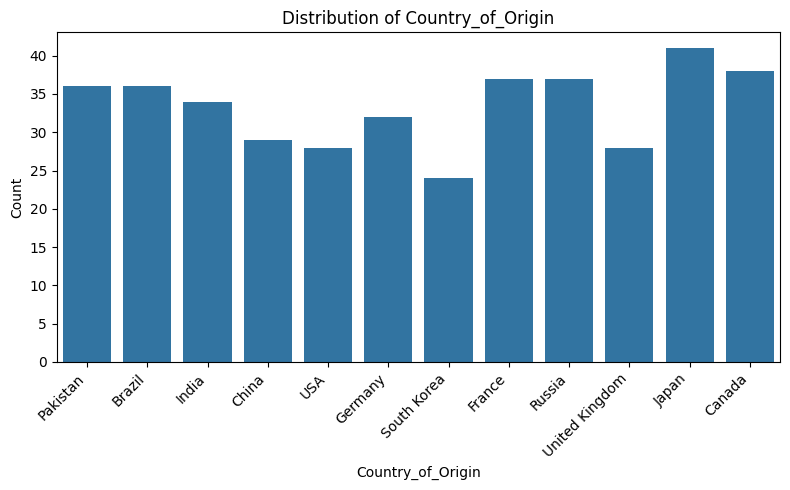

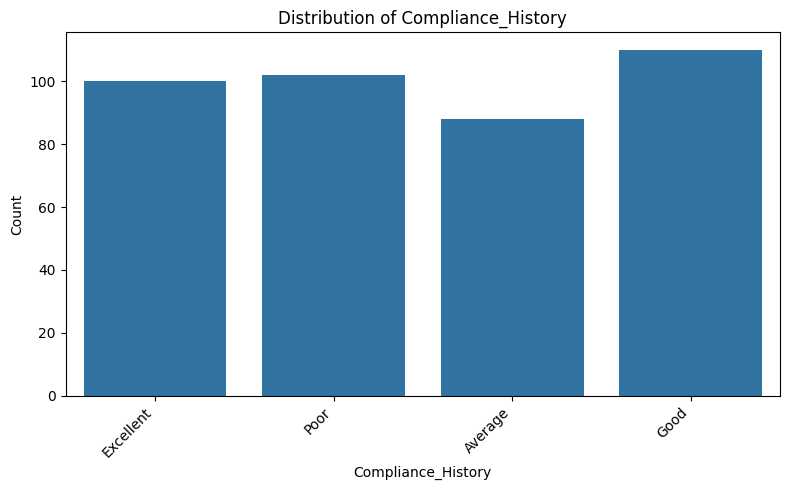

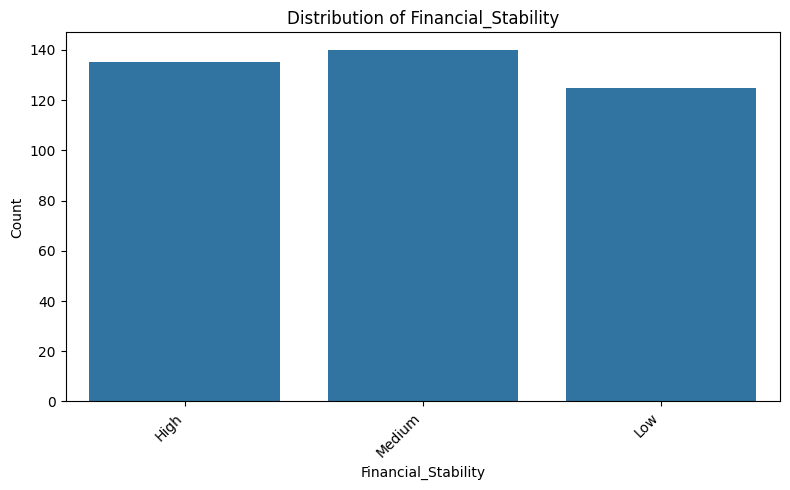

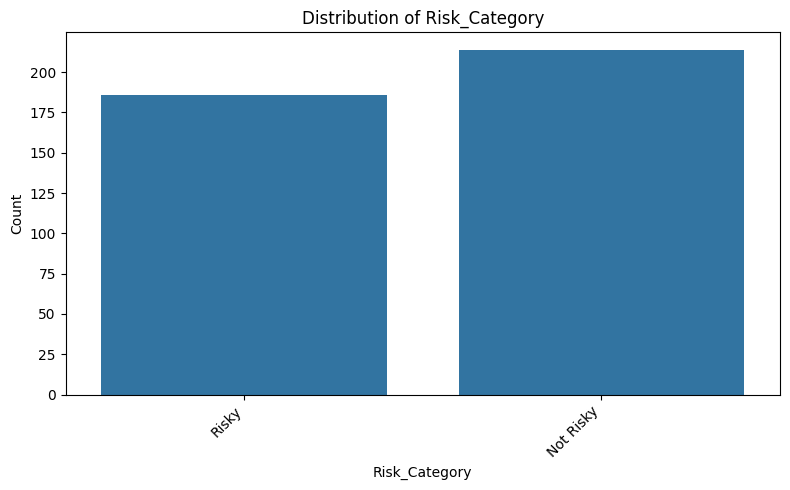

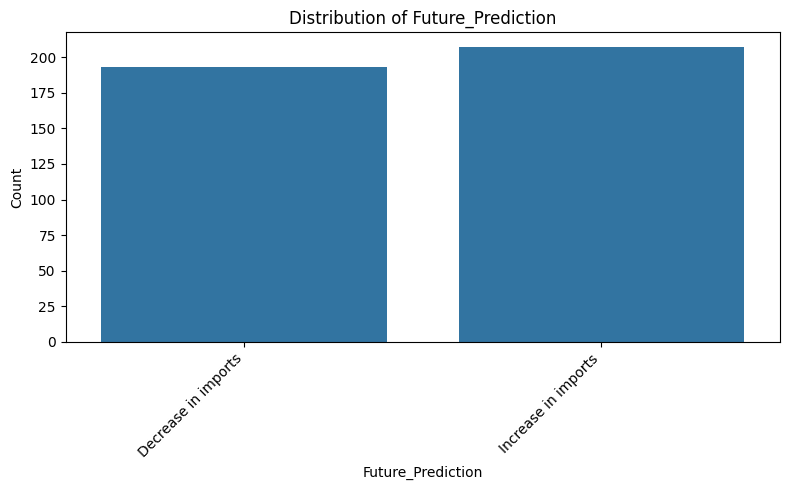

In [25]:

# List of specific categorical columns to visualize
categorical_cols = ['Country_of_Origin', 'Compliance_History', 'Financial_Stability', 'Risk_Category', 'Future_Prediction']

# Iterate through each categorical column and create a countplot
for col in categorical_cols:
    plt.figure(figsize=(8, 5))  # Adjust figure size to a smaller size
    sns.countplot(x=col, data=df)

    # Set plot titles and labels
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Ensure layout is tight and labels don't overlap
    plt.tight_layout()
    plt.show()
